In [1]:
source("/home/mnl/Statistik/masterthesis/code/modify_compute_elastic_mean.R")
set.seed(18)

# TURN WARNINGS OFF GLOBALLY, CAREFUL!
oldw <- getOption("warn")
options(warn = -1)
#options(warn = oldw)

# Display plots in smaller size
options(repr.plot.width=3, repr.plot.height=3)

Warning message:
“package ‘elasdics’ was built under R version 4.0.2”Loading required package: nlme
This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Attaching package: ‘dplyr’

The following object is masked from ‘package:nlme’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Elastic Procrustes Means
Means are calculated for some simulated and real world datasets.

#### Define some functions for rotating and scaling planar curves

In [2]:
rand_rotate_curve2d <- function(x){
  # rotate dataframe of 2D vectors randomly
  theta <- 2*pi*runif(1)
  mat <- matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), nrow = 2, ncol = 2)
  x.rot <- as.matrix(x) %*% t(mat)
  as.data.frame(x.rot)
}
rand_scale_curve2d <- function(x){
  # scale dataframe of 2D vectors randomly
  beta <- 0.5 + 0.5*runif(1)
  beta * x
}

### Datasets

#### Simulated spirals with random rotation and scaling

In [3]:
curve <- function(t){
  rbind(t*cos(13*t), t*sin(13*t))
}

data_curves <- lapply(1:4, function(i){
  m <- sample(10:15, 1)
  delta <- abs(rnorm(m, mean = 1, sd = 0.05))
  t <- cumsum(delta)/sum(delta)
  data.frame(t(curve(t)) + 0.07*t*matrix(cumsum(rnorm(2*length(delta))), ncol = 2))
})


data_curves <- lapply(data_curves, rand_rotate_curve2d)
data_curves <- lapply(data_curves, rand_scale_curve2d)
data_curves <- lapply(data_curves, center_curve)

#### Digits3 dataset

In [4]:
d3_curves <- shapes::digit3.dat
d3_curves <- apply(d3_curves, MARGIN = 3, FUN = function(i){
  data.frame(X1 = i[,1], X2 = i[,2])
})
d3_curves <- lapply(d3_curves, center_curve)

### Calculate Elastic Procrustes Means
#### Simulated Spirals

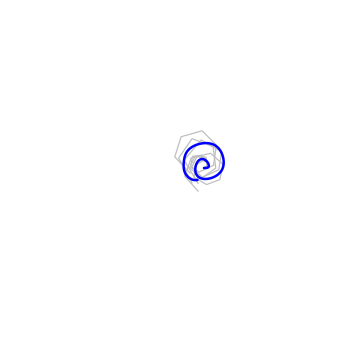

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

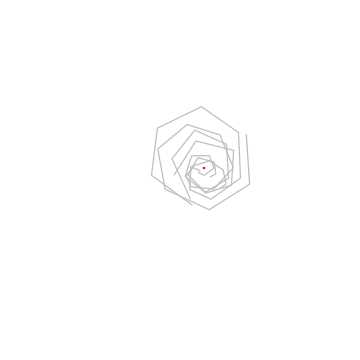

In [5]:
knots <- seq(0,1, length = 11)
smooth_elastic_mean <- compute_elastic_mean(data_curves, knots = knots)

#plot result
plot.new( )
plot.window( xlim=c(-1,1), ylim=c(-1,1), asp = 1)
lapply(data_curves, lines, col = "gray")
lines(get_evals(smooth_elastic_mean), type = "l", col = "red", lwd = 2)

#### Digits3

In [ ]:
knots <- seq(0,1, length = 30)
smooth_elastic_mean <- compute_elastic_mean(d3_curves, knots = knots)

#plot result
plot.new( )
plot.window( xlim=c(-15,15), ylim=c(-15,15), asp = 1)
lapply(d3_curves, lines, col = "gray")
lines(get_evals(smooth_elastic_mean), type = "l", col = "red", lwd = 2)